In [4]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("SalesKaggle3.csv")  # 데이터 로드 (파일 경로는 실제 데이터셋 경로로 수정)

df.head(3)

,Order,File_Type,SKU_number,SoldFlag,SoldCount,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,LowNetPrice
0,2,Historical,1737127,0.0,0.0,D,15,1,682743.0,44.99,2015,8,28.97,31.84
1,3,Historical,3255963,0.0,0.0,D,7,1,1016014.0,24.81,2005,39,0.00,15.54
2,4,Historical,612701,0.0,0.0,D,0,0,340464.0,46.00,2013,34,30.19,27.97


In [5]:
# # Step 1: Historical과 Active를 분리
# historical_df = df[df['File_Type'] == 'Historical'].copy()
# active_df = df[df['File_Type'] == 'Active'].copy()

# # Step 2: Strength_Factor를 Min-Max Scaling
# scaler = MinMaxScaler()
# historical_df['Scaled_Strength_Factor'] = scaler.fit_transform(historical_df[['Strength_Factor']])
# active_df['Scaled_Strength_Factor'] = scaler.fit_transform(active_df[['Strength_Factor']])

# # Step 3: Scaled_Strength_Factor를 Revenue로 대체
# historical_df['Revenue'] = historical_df['Scaled_Strength_Factor']
# active_df['Revenue'] = active_df['Scaled_Strength_Factor']

# # Step 4: 내림차순 정렬
# historical_df = historical_df.sort_values(by='Revenue', ascending=False).reset_index(drop=True)
# active_df = active_df.sort_values(by='Revenue', ascending=False).reset_index(drop=True)

# # Step 5: 누적 비율 계산
# historical_df['Cumulative_Revenue'] = historical_df['Revenue'].cumsum()
# active_df['Cumulative_Revenue'] = active_df['Revenue'].cumsum()

# historical_total_revenue = historical_df['Revenue'].sum()
# active_total_revenue = active_df['Revenue'].sum()

# historical_df['Cumulative_Percentage'] = historical_df['Cumulative_Revenue'] / historical_total_revenue * 100
# active_df['Cumulative_Percentage'] = active_df['Cumulative_Revenue'] / active_total_revenue * 100

# # Step 6: ABC 등급 할당
# def assign_abc(percentage):
#     if percentage <= 70:
#         return 'A'
#     elif percentage <= 90:
#         return 'B'
#     else:
#         return 'C'

# historical_df['ABC_Category'] = historical_df['Cumulative_Percentage'].apply(assign_abc)
# active_df['ABC_Category'] = active_df['Cumulative_Percentage'].apply(assign_abc)

# # 결과 확인
# historical_df, active_df

In [6]:
# Step 1: 데이터 필터링
filtered_df = df[df['File_Type'].isin(['Historical', 'Active'])]

# Step 2: SKU_number 별 판매량 합산
grouped_df = filtered_df.groupby('SKU_number', as_index=False).agg({
    'SoldCount': 'sum',
    'LowNetPrice': 'first'  # lownetprice는 동일 SKU_number에서 같다고 가정
})

# 판매량 0인 데이터 제외
filtered_sales_df = grouped_df[grouped_df['SoldCount'] > 0]

# Step 3: 매출액 계산
filtered_sales_df['Revenue'] = filtered_sales_df['SoldCount'] * filtered_sales_df['LowNetPrice']

# Step 4: 매출액 기준 내림차순 정렬
sorted_df = filtered_sales_df.sort_values(by='Revenue', ascending=False).reset_index(drop=True)

# Step 5: 매출액 기준 누적 비율 계산
sorted_df['Cumulative_Revenue'] = sorted_df['Revenue'].cumsum()
total_revenue = sorted_df['Revenue'].sum()
sorted_df['Cumulative_Percentage'] = sorted_df['Cumulative_Revenue'] / total_revenue * 100

# Step 6: ABC 등급 할당
def assign_abc(percentage):
    if percentage <= 70:
        return 'A'
    elif percentage <= 90:
        return 'B'
    else:
        return 'C'

sorted_df['ABC_Category'] = sorted_df['Cumulative_Percentage'].apply(assign_abc)

# 결과 확인
print(sorted_df[['SKU_number', 'Revenue', 'Cumulative_Percentage', 'ABC_Category']])

       SKU_number  Revenue  Cumulative_Percentage ABC_Category
0          614579  4311.15               0.423561            A
1          252016  3554.32               0.772765            A
2          860747  2797.47               1.047610            A
3          254518  2661.60               1.309106            A
4          767846  2123.28               1.517713            A
...           ...      ...                    ...          ...
12991      116717     0.00             100.000000            C
12992      864880     0.00             100.000000            C
12993      116112     0.00             100.000000            C
12994      194136     0.00             100.000000            C
12995      178116     0.00             100.000000            C

[12996 rows x 4 columns]


C:\Users\82102\AppData\Local\Temp\ipykernel_39180\1029806828.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sales_df['Revenue'] = filtered_sales_df['SoldCount'] * filtered_sales_df['LowNetPrice']


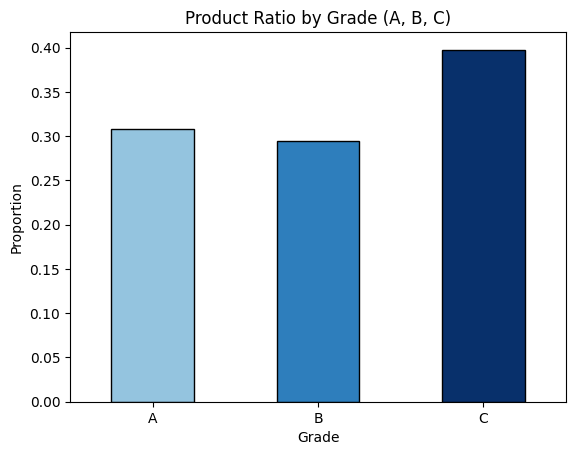

In [7]:
# sorted_df['ABC_Category'].value_counts(normalize=True).reindex(['A', 'B', 'C']).plot(kind='bar')
# plt.title('Product Ratio by Grade')
# plt.ylabel('Proportion')
# plt.show()

import matplotlib.pyplot as plt
import numpy as np

# 등급별 제품 비율 계산
grade_counts = sorted_df['ABC_Category'].value_counts(normalize=True).reindex(['A', 'B', 'C'])

# 색상 그라데이션 설정
colors = plt.cm.Blues(np.linspace(0.4, 1, len(grade_counts)))

# 막대그래프 그리기
grade_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Product Ratio by Grade (A, B, C)')
plt.xlabel('Grade')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
# plt.ylim(0, 1)
plt.show()

In [8]:
# sorted_df['Grade'].value_counts(normalize=True).plot(kind='bar')
# plt.title('Product Ratio by Grade')
# plt.ylabel('Proportion')
# plt.show()

In [9]:
df.columns

Index(['Order', 'File_Type', 'SKU_number', 'SoldFlag', 'SoldCount',
       'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor',
       'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice', 'LowNetPrice'],
      dtype='object')

In [10]:
merged_df = pd.merge(df[['File_Type', 'SKU_number', 'SoldFlag', 'MarketingType', 'ReleaseNumber', 'New_Release_Flag', 'StrengthFactor', 'PriceReg', 'ReleaseYear', 'ItemCount', 'LowUserPrice']], sorted_df, on='SKU_number', how='inner')
# 결과 확인
merged_df.head()

merged_df['MarketingType'] = merged_df['MarketingType'].apply(lambda x: 1 if x == 'S' else 0)

In [11]:
merged_df['discount_rate'] = 100 - ((merged_df['LowUserPrice'] / merged_df['PriceReg']) * 100)
import numpy as np
merged_df['discount_rate'] = merged_df['discount_rate'].replace([-np.inf, np.nan], 0)
# merged_df['discount_rate'] = merged_df['discount_rate'].apply(lambda x: max(x, 0))

merged_df['rotation'] = merged_df['SoldCount'] / merged_df['ItemCount']
merged_df['rotation'] = merged_df['discount_rate'].replace(np.inf, 100)

In [12]:
merged_df

,File_Type,SKU_number,SoldFlag,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,SoldCount,LowNetPrice,Revenue,Cumulative_Revenue,Cumulative_Percentage,ABC_Category,discount_rate,rotation
0,Historical,115883,1.0,0,4,1,3.340110e+05,100.00,2006,20,133.93,1.0,83.15,83.15,673604.70,66.180131,A,-33.930000,-33.930000
1,Historical,863939,1.0,0,2,1,1.287938e+06,121.95,2010,28,4.00,1.0,23.99,23.99,970520.11,95.351395,C,96.719967,96.719967
2,Historical,110699,1.0,0,6,1,3.831290e+05,120.39,2007,69,170.45,1.0,78.99,78.99,687623.25,67.557421,A,-41.581527,-41.581527
3,Historical,210839,1.0,0,1,0,1.568054e+06,42.95,2001,23,57.94,1.0,18.99,18.99,989121.34,97.178924,C,-34.901048,-34.901048
4,Historical,2387463,1.0,0,6,1,2.701930e+05,0.00,1979,22,141.98,1.0,76.22,76.22,702765.96,69.045158,A,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Active,1655503,NaN,1,1,0,2.314441e+05,45.00,2009,52,8.70,2.0,59.19,118.38,538411.19,52.897676,A,80.666667,80.666667
25476,Historical,2771892,1.0,1,0,0,5.052270e+05,50.00,1989,21,0.00,1.0,39.90,39.90,902835.06,88.701493,B,100.000000,100.000000
25477,Active,2771892,NaN,1,0,0,4.184651e+05,50.00,1989,23,17.82,1.0,39.90,39.90,902835.06,88.701493,B,64.360000,64.360000
25478,Historical,802560,1.0,1,4,1,2.804553e+06,49.99,2005,29,30.50,1.0,13.68,13.68,1006070.74,98.844164,C,38.987798,38.987798


In [13]:
# sorted_df.to_csv("ABC.csv", index = False, encoding = 'utf-8-sig')

In [14]:
# Step 7: 등급별 점유 비율 계산
# 제품 수 점유율
category_counts = sorted_df['ABC_Category'].value_counts(normalize=True) * 100

# 매출액 점유율
category_revenue = sorted_df.groupby('ABC_Category')['Revenue'].sum()
category_revenue_percentage = (category_revenue / total_revenue) * 100

# 결과 출력
print("등급별 제품 수 점유율 (%):")
print(category_counts)
print("\n등급별 매출액 점유율 (%):")
print(category_revenue_percentage)

등급별 제품 수 점유율 (%):
C    39.758387
A    30.771006
B    29.470606
Name: ABC_Category, dtype: float64

등급별 매출액 점유율 (%):
ABC_Category
A    69.996554
B    20.003265
C    10.000181
Name: Revenue, dtype: float64


In [15]:
# Step 1: Historical과 Active를 분리
historical_df = df[df['File_Type'] == 'Historical'].copy()
active_df = df[df['File_Type'] == 'Active'].copy()

# Historical과 Active 데이터에서 SKU_number 추출
historical_skus = set(historical_df['SKU_number'])
active_skus = set(active_df['SKU_number'])

# 경우의 수 확인
sku_case = []

for sku in sorted_df['SKU_number']:
    if sku in historical_skus and sku in active_skus:
        sku_case.append("Both")
    elif sku in historical_skus:
        sku_case.append("Historical Only")
    elif sku in active_skus:
        sku_case.append("Active Only")

# 데이터프레임으로 정리
sku_case_df = pd.DataFrame({'SKU_number': sorted_df['SKU_number'], 'Case': sku_case, 'ABC' : sorted_df['ABC_Category']})

# 경우의 수별 value_counts
case_counts = sku_case_df[['Case', 'ABC']].value_counts()
sku_case_df, case_counts

(       SKU_number  Case ABC
 0          614579  Both   A
 1          252016  Both   A
 2          860747  Both   A
 3          254518  Both   A
 4          767846  Both   A
 ...           ...   ...  ..
 12991      116717  Both   C
 12992      864880  Both   C
 12993      116112  Both   C
 12994      194136  Both   C
 12995      178116  Both   C
 
 [12996 rows x 3 columns],
 Case             ABC
 Both             C      4962
                  A      3833
                  B      3689
 Historical Only  C       205
                  A       166
                  B       141
 dtype: int64)

In [16]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')  # Windows 사용자

# 한글 깨짐 방지를 위한 마이너 문제 해결
plt.rcParams['axes.unicode_minus'] = False

In [17]:
# ABC 등급별 그룹화
grouped = merged_df.groupby('ABC_Category')

# 기술 통계 확인
stats = grouped[['ReleaseNumber']].describe()
print(stats)

             ReleaseNumber                                              
                     count      mean       std  min  25%  50%  75%   max
ABC_Category                                                            
A                   7832.0  5.256384  4.234705  0.0  2.0  4.0  8.0  61.0
B                   7519.0  4.775768  4.146877  0.0  2.0  4.0  7.0  66.0
C                  10129.0  4.428868  3.914456  0.0  2.0  3.0  6.0  53.0


C:\Users\82102\AppData\Local\Temp\ipykernel_39180\3042693226.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ABC_Category', y='ReleaseNumber', data=grouped_data, palette='pastel')


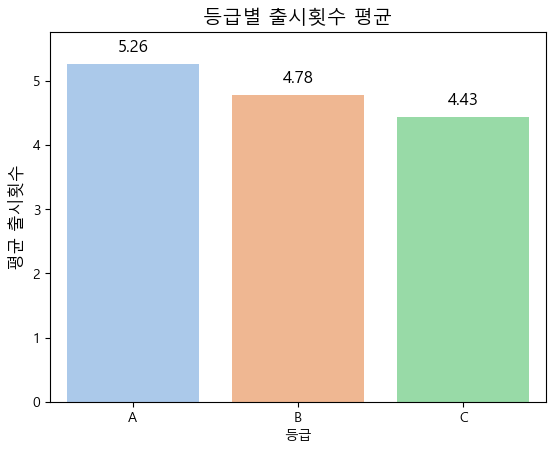

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# palette = {'A': 'green', 'B': 'yellow', 'C': 'red'}
palette = sns.color_palette("coolwarm", as_cmap=False)

# 등급별 평균 계산
grouped_data = merged_df.groupby('ABC_Category')['ReleaseNumber'].mean().reset_index()

# 각 바의 상단에 값 표시
for index, row in grouped_data.iterrows():
    plt.text(index, row['ReleaseNumber'] + 0.2, f"{row['ReleaseNumber']:.2f}", 
             color='black', ha="center", fontsize=12)

# 바 차트 시각화
sns.barplot(x='ABC_Category', y='ReleaseNumber', data=grouped_data, palette='pastel')
plt.title('등급별 출시횟수 평균', fontsize=14)
plt.ylabel('평균 출시횟수', fontsize=12)
plt.xlabel('등급')
plt.ylim(0, grouped_data['ReleaseNumber'].max() + 0.5)  # y축 여유 공간 추가
plt.show()

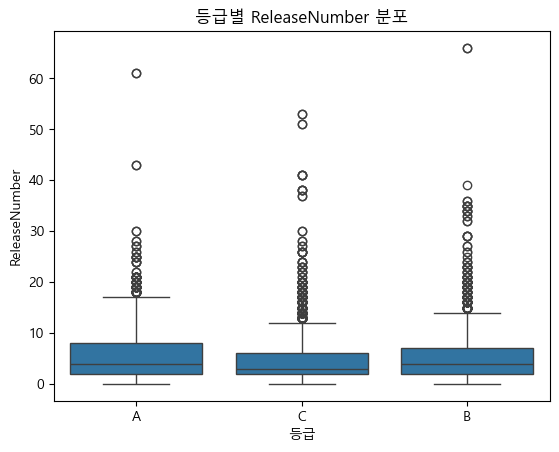

In [222]:
sns.boxplot(x='ABC_Category', y='ReleaseNumber', data=merged_df)
plt.title('등급별 ReleaseNumber 분포')
plt.ylabel('ReleaseNumber')
plt.xlabel('등급')
plt.show()

In [227]:
# 기술 통계 확인
stats = grouped[['StrengthFactor']].describe()
print(stats)

             StrengthFactor                                           \
                      count           mean            std        min   
ABC_Category                                                           
A                    7832.0  498754.586847  820032.732457   63.41375   
B                    7519.0  600369.196992  821299.876324  258.82125   
C                   10129.0  775927.558630  867394.373934   85.50750   

                                                                    
                        25%          50%           75%         max  
ABC_Category                                                        
A              55614.045937  222275.9094  6.202419e+05  15599056.0  
B             103023.913150  326419.0000  7.784172e+05  10770527.0  
C             200598.817500  532814.8950  1.041921e+06  11765582.0  


C:\Users\82102\AppData\Local\Temp\ipykernel_39180\2215721860.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ABC_Category', y='StrengthFactor', data=grouped_data, palette='pastel')


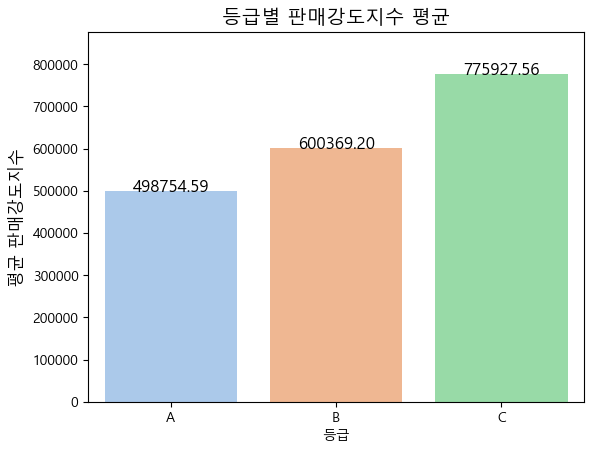

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 평균 계산
grouped_data = merged_df.groupby('ABC_Category')['StrengthFactor'].mean().reset_index()

# 각 바의 상단에 값 표시
for index, row in grouped_data.iterrows():
    plt.text(index, row['StrengthFactor'] + 0.2, f"{row['StrengthFactor']:.2f}", 
             color='black', ha="center", fontsize=12)

# 바 차트 시각화
sns.barplot(x='ABC_Category', y='StrengthFactor', data=grouped_data, palette='pastel')
plt.title('등급별 판매강도지수 평균', fontsize=14)
plt.ylabel('평균 판매강도지수', fontsize=12)
plt.xlabel('등급')
plt.ylim(0, grouped_data['StrengthFactor'].max() + 100000)  # y축 여유 공간 추가
plt.show()

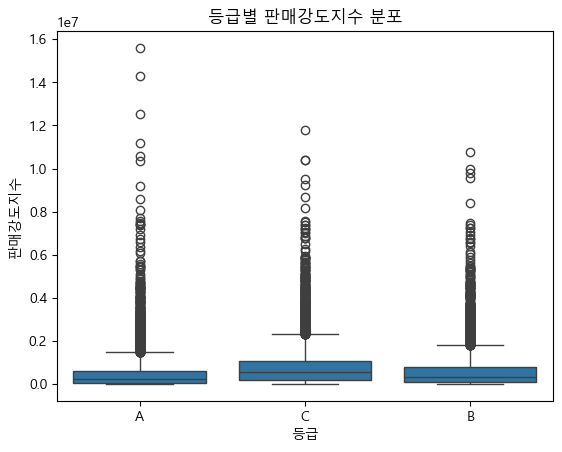

In [242]:
sns.boxplot(x='ABC_Category', y='StrengthFactor', data=merged_df)
plt.title('등급별 판매강도지수 분포')
plt.ylabel('판매강도지수')
plt.xlabel('등급')
plt.show()

In [245]:
# 기술 통계 확인
stats = grouped[['PriceReg']].describe()
print(stats)

             PriceReg                                                      \
                count        mean        std  min    25%     50%      75%   
ABC_Category                                                                
A              7832.0  139.462718  90.385142  0.0  76.00  122.80  187.000   
B              7519.0  114.281955  83.978217  0.0  59.99   93.98  146.705   
C             10129.0   94.335656  75.834430  0.0  44.00   76.33  124.800   

                       
                  max  
ABC_Category           
A             1733.67  
B             2000.00  
C             1653.67  


C:\Users\82102\AppData\Local\Temp\ipykernel_39180\3681820902.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ABC_Category', y='PriceReg', data=grouped_data, palette='pastel')


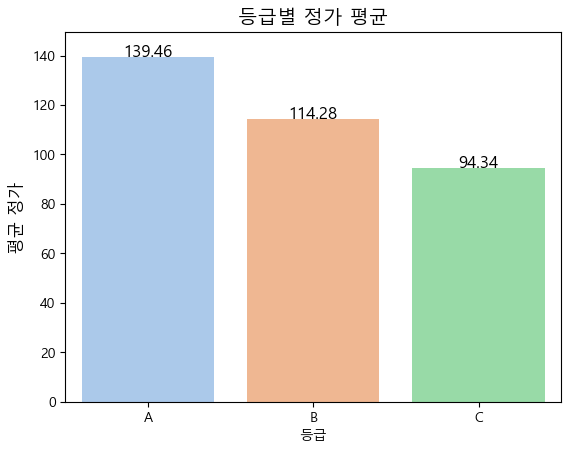

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 평균 계산
grouped_data = merged_df.groupby('ABC_Category')['PriceReg'].mean().reset_index()

# 각 바의 상단에 값 표시
for index, row in grouped_data.iterrows():
    plt.text(index, row['PriceReg'] + 0.2, f"{row['PriceReg']:.2f}", 
             color='black', ha="center", fontsize=12)

# 바 차트 시각화
sns.barplot(x='ABC_Category', y='PriceReg', data=grouped_data, palette='pastel')
plt.title('등급별 정가 평균', fontsize=14)
plt.ylabel('평균 정가', fontsize=12)
plt.xlabel('등급')
plt.ylim(0, grouped_data['PriceReg'].max() + 10)  # y축 여유 공간 추가
plt.show()

In [183]:
# 기술 통계 확인
stats = grouped[['LowUserPrice']].describe()
print(stats)

             LowUserPrice                                                     \
                    count       mean        std  min     25%     50%     75%   
ABC_Category                                                                   
A                  7832.0  49.200687  65.921326  0.0  7.4575  30.085  77.870   
B                  7519.0  41.177833  58.627464  0.0  5.5100  21.990  62.375   
C                 10129.0  33.982186  42.682039  0.0  4.0000   9.530  53.860   

                       
                  max  
ABC_Category           
A             2646.73  
B             2646.73  
C              539.26  


C:\Users\82102\AppData\Local\Temp\ipykernel_39180\2508333184.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ABC_Category', y='LowUserPrice', data=grouped_data, palette='pastel')


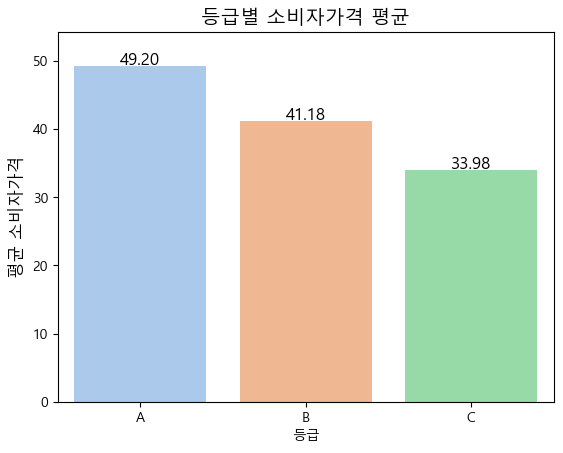

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 평균 계산
grouped_data = merged_df.groupby('ABC_Category')['LowUserPrice'].mean().reset_index()

# 각 바의 상단에 값 표시
for index, row in grouped_data.iterrows():
    plt.text(index, row['LowUserPrice'] + 0.2, f"{row['LowUserPrice']:.2f}", 
             color='black', ha="center", fontsize=12)

# 바 차트 시각화
sns.barplot(x='ABC_Category', y='LowUserPrice', data=grouped_data, palette='pastel')
plt.title('등급별 소비자가격 평균', fontsize=14)
plt.ylabel('평균 소비자가격', fontsize=12)
plt.xlabel('등급')
plt.ylim(0, grouped_data['LowUserPrice'].max() + 5)  # y축 여유 공간 추가
plt.show()

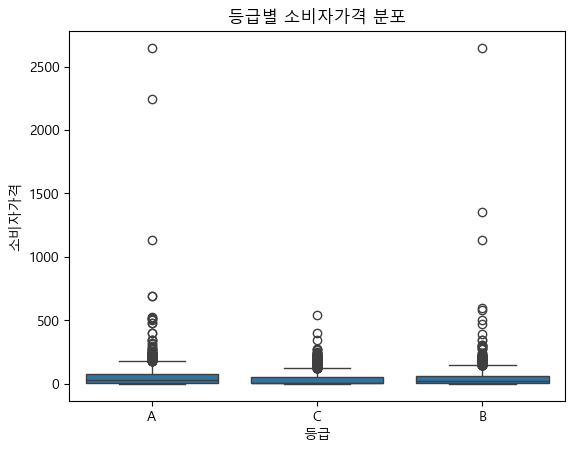

In [252]:
sns.boxplot(x='ABC_Category', y='LowUserPrice', data=merged_df)
plt.title('등급별 소비자가격 분포')
plt.ylabel('소비자가격')
plt.xlabel('등급')
plt.show()

In [254]:
# 기술 통계 확인
stats = grouped[['discount_rate']].describe()
print(stats)

             discount_rate                                                  \
                     count       mean         std           min        25%   
ABC_Category                                                                 
A                   7832.0  51.419909  101.354037  -3711.804009  38.271126   
B                   7519.0  46.226562  151.511396  -8658.000000  36.424446   
C                  10129.0  31.969004  222.069816 -14682.000000  33.388982   

                                           
                    50%        75%    max  
ABC_Category                               
A             74.960084  92.654155  100.0  
B             74.626636  93.230580  100.0  
C             77.620253  94.736842  100.0  


C:\Users\82102\AppData\Local\Temp\ipykernel_39180\2362773832.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ABC_Category', y='discount_rate', data=grouped_data, palette='pastel')


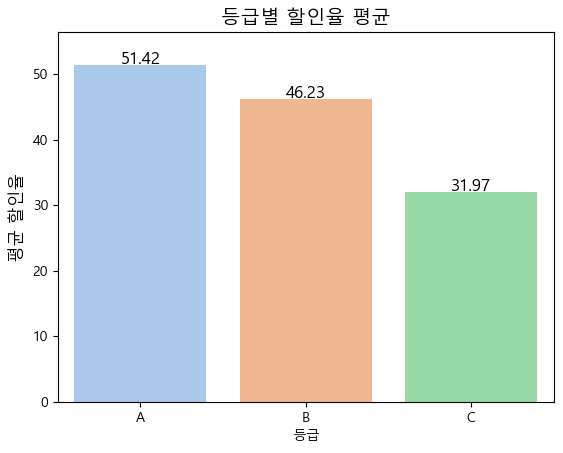

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 평균 계산
grouped_data = merged_df.groupby('ABC_Category')['discount_rate'].mean().reset_index()

# 각 바의 상단에 값 표시
for index, row in grouped_data.iterrows():
    plt.text(index, row['discount_rate'] + 0.2, f"{row['discount_rate']:.2f}", 
             color='black', ha="center", fontsize=12)

# 바 차트 시각화
sns.barplot(x='ABC_Category', y='discount_rate', data=grouped_data, palette='pastel')
plt.title('등급별 할인율 평균', fontsize=14)
plt.ylabel('평균 할인율', fontsize=12)
plt.xlabel('등급')
plt.ylim(0, grouped_data['discount_rate'].max() + 5)  # y축 여유 공간 추가
plt.show()

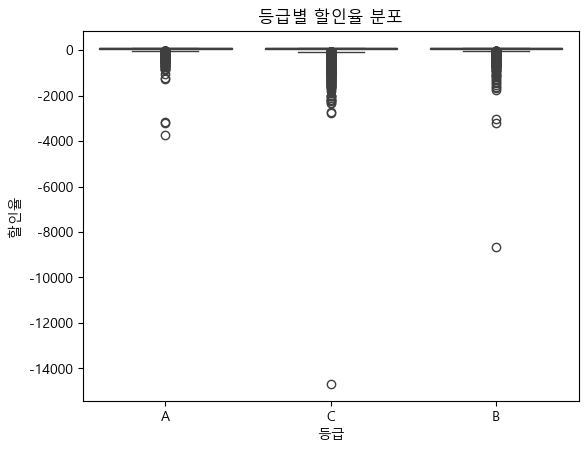

In [256]:
sns.boxplot(x='ABC_Category', y='discount_rate', data=merged_df)
plt.title('등급별 할인율 분포')
plt.ylabel('할인율')
plt.xlabel('등급')
plt.show()

In [257]:
# 기술 통계 확인
stats = grouped[['rotation']].describe()
print(stats)

             rotation                                                  \
                count       mean         std           min        25%   
ABC_Category                                                            
A              7832.0  51.419909  101.354037  -3711.804009  38.271126   
B              7519.0  46.226562  151.511396  -8658.000000  36.424446   
C             10129.0  31.969004  222.069816 -14682.000000  33.388982   

                                           
                    50%        75%    max  
ABC_Category                               
A             74.960084  92.654155  100.0  
B             74.626636  93.230580  100.0  
C             77.620253  94.736842  100.0  


C:\Users\82102\AppData\Local\Temp\ipykernel_39180\2809221743.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ABC_Category', y='rotation', data=grouped_data, palette='pastel')


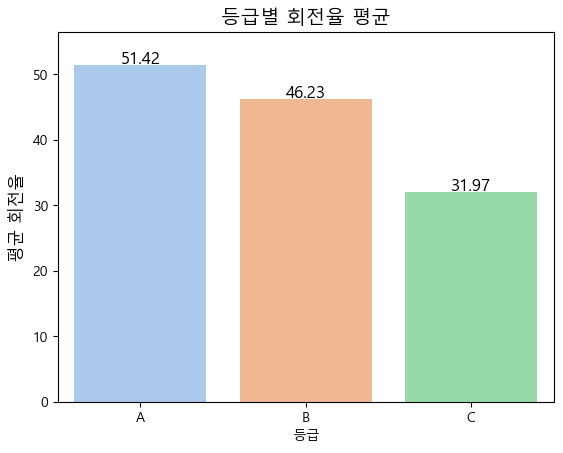

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 등급별 평균 계산
grouped_data = merged_df.groupby('ABC_Category')['rotation'].mean().reset_index()

# 각 바의 상단에 값 표시
for index, row in grouped_data.iterrows():
    plt.text(index, row['rotation'] + 0.2, f"{row['rotation']:.2f}", 
             color='black', ha="center", fontsize=12)

# 바 차트 시각화
sns.barplot(x='ABC_Category', y='rotation', data=grouped_data, palette='pastel')
plt.title('등급별 회전율 평균', fontsize=14)
plt.ylabel('평균 회전율', fontsize=12)
plt.xlabel('등급')
plt.ylim(0, grouped_data['rotation'].max() + 5)  # y축 여유 공간 추가
plt.show()

In [186]:
merged_df

,File_Type,SKU_number,SoldFlag,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,SoldCount,LowNetPrice,Revenue,Cumulative_Revenue,Cumulative_Percentage,ABC_Category,discount_rate,rotation
0,Historical,115883,1.0,0,4,1,3.340110e+05,100.00,2006,20,133.93,1.0,83.15,83.15,673604.70,66.180131,A,-33.930000,-33.930000
1,Historical,863939,1.0,0,2,1,1.287938e+06,121.95,2010,28,4.00,1.0,23.99,23.99,970520.11,95.351395,C,96.719967,96.719967
2,Historical,110699,1.0,0,6,1,3.831290e+05,120.39,2007,69,170.45,1.0,78.99,78.99,687623.25,67.557421,A,-41.581527,-41.581527
3,Historical,210839,1.0,0,1,0,1.568054e+06,42.95,2001,23,57.94,1.0,18.99,18.99,989121.34,97.178924,C,-34.901048,-34.901048
4,Historical,2387463,1.0,0,6,1,2.701930e+05,0.00,1979,22,141.98,1.0,76.22,76.22,702765.96,69.045158,A,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Active,1655503,NaN,1,1,0,2.314441e+05,45.00,2009,52,8.70,2.0,59.19,118.38,538411.19,52.897676,A,80.666667,80.666667
25476,Historical,2771892,1.0,1,0,0,5.052270e+05,50.00,1989,21,0.00,1.0,39.90,39.90,902835.06,88.701493,B,100.000000,100.000000
25477,Active,2771892,NaN,1,0,0,4.184651e+05,50.00,1989,23,17.82,1.0,39.90,39.90,902835.06,88.701493,B,64.360000,64.360000
25478,Historical,802560,1.0,1,4,1,2.804553e+06,49.99,2005,29,30.50,1.0,13.68,13.68,1006070.74,98.844164,C,38.987798,38.987798


In [187]:
merged_df

,File_Type,SKU_number,SoldFlag,MarketingType,ReleaseNumber,New_Release_Flag,StrengthFactor,PriceReg,ReleaseYear,ItemCount,LowUserPrice,SoldCount,LowNetPrice,Revenue,Cumulative_Revenue,Cumulative_Percentage,ABC_Category,discount_rate,rotation
0,Historical,115883,1.0,0,4,1,3.340110e+05,100.00,2006,20,133.93,1.0,83.15,83.15,673604.70,66.180131,A,-33.930000,-33.930000
1,Historical,863939,1.0,0,2,1,1.287938e+06,121.95,2010,28,4.00,1.0,23.99,23.99,970520.11,95.351395,C,96.719967,96.719967
2,Historical,110699,1.0,0,6,1,3.831290e+05,120.39,2007,69,170.45,1.0,78.99,78.99,687623.25,67.557421,A,-41.581527,-41.581527
3,Historical,210839,1.0,0,1,0,1.568054e+06,42.95,2001,23,57.94,1.0,18.99,18.99,989121.34,97.178924,C,-34.901048,-34.901048
4,Historical,2387463,1.0,0,6,1,2.701930e+05,0.00,1979,22,141.98,1.0,76.22,76.22,702765.96,69.045158,A,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25475,Active,1655503,NaN,1,1,0,2.314441e+05,45.00,2009,52,8.70,2.0,59.19,118.38,538411.19,52.897676,A,80.666667,80.666667
25476,Historical,2771892,1.0,1,0,0,5.052270e+05,50.00,1989,21,0.00,1.0,39.90,39.90,902835.06,88.701493,B,100.000000,100.000000
25477,Active,2771892,NaN,1,0,0,4.184651e+05,50.00,1989,23,17.82,1.0,39.90,39.90,902835.06,88.701493,B,64.360000,64.360000
25478,Historical,802560,1.0,1,4,1,2.804553e+06,49.99,2005,29,30.50,1.0,13.68,13.68,1006070.74,98.844164,C,38.987798,38.987798


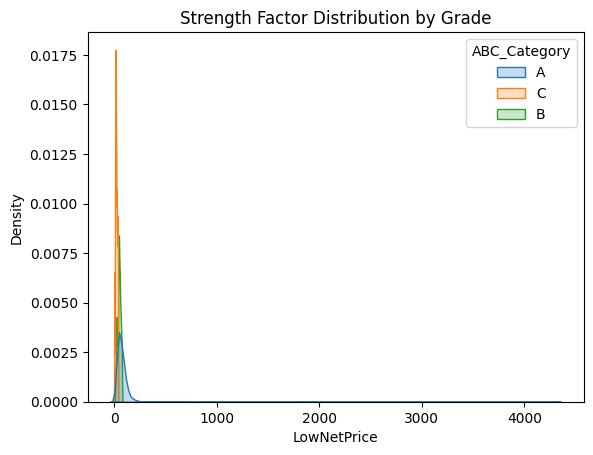

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Strength_Factor의 등급별 분포
sns.kdeplot(data=merged_df, x='LowNetPrice', hue='ABC_Category', fill=True)
plt.title('Strength Factor Distribution by Grade')
plt.show()

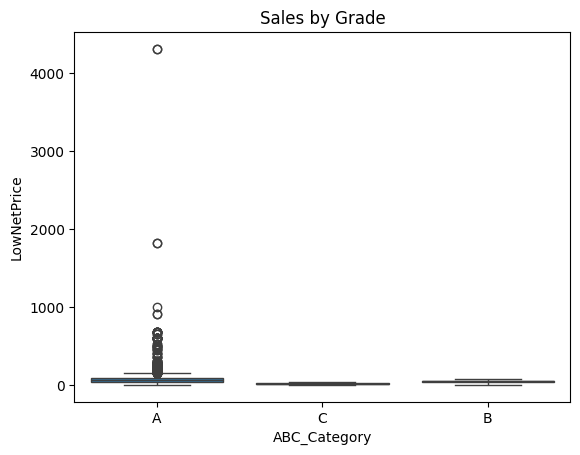

In [189]:
sns.boxplot(data=merged_df, x='ABC_Category', y='LowNetPrice')
plt.title('Sales by Grade')
plt.show()

In [190]:
# A 등급 데이터
grade_a = merged_df[merged_df['ABC_Category'] == 'A']

# 상관관계 분석
correlation = grade_a.corr()
# print(correlation)

strong_correlations = correlation[(correlation >= 0.5) & (correlation < 0.99)]

# 결과 출력
strong_correlations = strong_correlations.stack().reset_index(name='Correlation')
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
print(strong_correlations)

         Variable 1        Variable 2  Correlation
0     ReleaseNumber  New_Release_Flag     0.523750
1  New_Release_Flag     ReleaseNumber     0.523750
2         SoldCount           Revenue     0.544005
3           Revenue         SoldCount     0.544005


C:\Users\82102\AppData\Local\Temp\ipykernel_37884\901667293.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = grade_a.corr()


In [191]:
# A 등급 데이터
grade_a = merged_df[merged_df['ABC_Category'] == 'B']

# 상관관계 분석
correlation = grade_a.corr()
# print(correlation)

strong_correlations = correlation[(correlation >= 0.4) & (correlation < 0.99)]

# 결과 출력
strong_correlations = strong_correlations.stack().reset_index(name='Correlation')
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
print(strong_correlations)

         Variable 1        Variable 2  Correlation
0     ReleaseNumber  New_Release_Flag     0.495202
1  New_Release_Flag     ReleaseNumber     0.495202
2       LowNetPrice           Revenue     0.460181
3           Revenue       LowNetPrice     0.460181


C:\Users\82102\AppData\Local\Temp\ipykernel_37884\2773261981.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = grade_a.corr()


In [192]:
# A 등급 데이터
grade_a = merged_df[merged_df['ABC_Category'] == 'C']

# 상관관계 분석
correlation = grade_a.corr()
# print(correlation)

strong_correlations = correlation[(correlation >= 0.5) & (correlation < 0.99)]

# 결과 출력
strong_correlations = strong_correlations.stack().reset_index(name='Correlation')
strong_correlations.columns = ['Variable 1', 'Variable 2', 'Correlation']
print(strong_correlations)

C:\Users\82102\AppData\Local\Temp\ipykernel_37884\675441926.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = grade_a.corr()


         Variable 1        Variable 2  Correlation
0     ReleaseNumber  New_Release_Flag     0.527609
1  New_Release_Flag     ReleaseNumber     0.527609
2       LowNetPrice           Revenue     0.863857
3           Revenue       LowNetPrice     0.863857
